In [2]:
import subprocess
import pdb

import os
import glob
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
from nilearn.plotting import view_img_on_surf, view_img
from scipy.stats import ttest_1samp

import networkx as nx
from IPython.display import HTML

# import nest_asyncio
# nest_asyncio.apply()
# import datalad.api as dl

import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import scipy.io
from scipy import stats

from sklearn.manifold import MDS
import scipy.spatial.distance as sp_distance
from sklearn.preprocessing import RobustScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

import time
from copy import deepcopy
import numpy as np
import pandas as pd 

from nilearn import datasets
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib

from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import isc, isfc, isps, fdr, threshold, phase_randomize, circle_shift, _butter_bandpass_filter, _phase_mean_angle, _phase_vector_length
from nilearn.plotting import view_img_on_surf, view_img
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state

# from brainiak import image, io
# from brainiak.isc import isc, isfc, permutation_isc
import matplotlib.pyplot as plt
import seaborn as sns 

from datetime import datetime as dt
from scipy.signal import hilbert, butter, filtfilt
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

%autosave 5
%matplotlib inline
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

# %matplotlib notebook
%matplotlib inline
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})
sns.set(palette="colorblind")

from py3plex.core import multinet
from py3plex.core import random_generators
from py3plex.algorithms.community_detection import infomap
import numpy as np
import queue
import matplotlib.pyplot as plt
import seaborn as sns

from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import pickle
from datetime import datetime
from time import time
from scipy import stats

from py3plex.core.parsers import  parse_network
from py3plex.core import multinet

import numpy as np
import pylab

from tqdm import tqdm

from multiprocess import Pool
from py3plex.algorithms.statistics.basic_statistics import core_network_statistics, identify_n_hubs

from py3plex.algorithms.community_detection import community_wrapper as cw
from py3plex.core import multinet
from py3plex.visualization.multilayer import hairball_plot, plt
from py3plex.visualization.colors import colors_default
from collections import Counter

import community as community_louvain
from py3plex.algorithms.multilayer_algorithms.entanglement import compute_entanglement_analysis



Autosaving every 5 seconds


Autosaving every 5 seconds


In [3]:
def onetoughjar(path2dic):
    p = os.path.join(path2dic)
    list_of_files = glob.glob(p) # * means all if need specific format then *.csv
    print(list_of_files)
    latest_file = max(list_of_files, key=os.path.getctime)
    print(latest_file)
    with open(latest_file, 'rb') as pickle_file:
        try:
            while True:
                output = pickle.load(pickle_file)
        except EOFError:
            pass
    return(output)
    
    
    

In [4]:
def adillyofapickle(basepath, dic, name):
    datefmt='%m-%d-%Y_%I-%M-%S'
    st = datetime.fromtimestamp(time()).strftime(datefmt)
    if os.path.exists(os.path.join(basepath,'tmp')):
        print('already have tmp')
    else:
        os.makedirs(os.path.join(basepath,'tmp'))
    pickle.dump(dic, open(os.path.join(basepath,'tmp','%s_%s'%(name,st)), 'wb'), protocol=4)


In [5]:
datapath = '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/clamp'

In [6]:
basepath = '/Users/gracer/Documents/BBC_21-2939_prepro_data'
tasks = ['base','clamp']

savepath = os.path.join(basepath,'derivatives','output')

In [7]:
multi_nets = onetoughjar(os.path.join(savepath, 'tmp','multi_nets*'))

['/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_03-08-29', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_06-02-40', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_05-49-00']
/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/multi_nets_06-30-2022_06-02-40


In [8]:
X = onetoughjar(os.path.join(savepath,'tmp','graphs_weight_dist_smz*'))

['/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-23-2022_05-03-32', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-23-2022_05-01-20', '/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-30-2022_01-27-24']
/Users/gracer/Documents/BBC_21-2939_prepro_data/derivatives/output/tmp/graphs_weight_dist_smz_06-30-2022_01-27-24


In [9]:
shapeup = {'high':
           {'20001':{},'20002':{},'20003':{},'20004':{},'20008':{},'20010':{}},
           'neu':{'20001':{},'20002':{},'20003':{},'20004':{},'20008':{},'20010':{}},
           'low':{'20001':{},'20002':{},'20003':{},'20004':{},'20008':{},'20010':{}}}

In [10]:
for z in multi_nets:
    for key, value in z.items():
        for k, v in value.items():
            for num, net in v.items():
                shapeup[k][key].update({num : net['network']})
    

In [11]:
shapeup.keys()

dict_keys(['high', 'neu', 'low'])

In [40]:
value = shapeup['low']['20001']['1']
network_labels, graphs, multilinks = value.get_layers()

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 243.48it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 289.24it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 282.70it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 302.54it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.24  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 268.51it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 311.59it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.23  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 265.49it/s]

BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


In [41]:
G = graphs[0]
H = G.copy()

In [42]:
rmv = {}
for node, value in G.degree():
    if value < 5:
        rmv[node] = value
        H.remove_node(node)

In [43]:
H.nodes(data = True)

NodeDataView({('619', 'Pu'): {'type': 'Pu', 'pos': array([0.59026426, 0.7804962 ])}, ('629', 'Pu'): {'type': 'Pu', 'pos': array([0.37457613, 0.5625377 ])}, ('660', 'Pu'): {'type': 'Pu', 'pos': array([0.69180101, 0.38103444])}, ('659', 'Pu'): {'type': 'Pu', 'pos': array([0.69180337, 0.35286989])}, ('645', 'Pu'): {'type': 'Pu', 'pos': array([0.67014626, 0.44879283])}})

In [68]:
X['low']['20001']['Pu'][1]['node_maps']

{0: 600,
 1: 601,
 2: 602,
 3: 603,
 4: 604,
 5: 605,
 6: 606,
 7: 607,
 8: 608,
 9: 609,
 10: 610,
 11: 611,
 12: 612,
 13: 613,
 14: 614,
 15: 615,
 16: 616,
 17: 617,
 18: 618,
 19: 619,
 20: 620,
 21: 621,
 22: 622,
 23: 623,
 24: 624,
 25: 625,
 26: 626,
 27: 627,
 28: 628,
 29: 629,
 30: 630,
 31: 631,
 32: 632,
 33: 633,
 34: 634,
 35: 635,
 36: 636,
 37: 637,
 38: 638,
 39: 639,
 40: 640,
 41: 641,
 42: 642,
 43: 643,
 44: 644,
 45: 645,
 46: 646,
 47: 647,
 48: 648,
 49: 649,
 50: 650,
 51: 651,
 52: 652,
 53: 653,
 54: 654,
 55: 655,
 56: 656,
 57: 657,
 58: 658,
 59: 659,
 60: 660}

In [74]:
keep

{19: 619, 29: 629, 60: 660, 59: 659, 45: 645}

In [72]:
keep = {}
for x,y in H.nodes(data = True):
    print('thsi is %s'%x[0])
    for k, v in X['low']['20001']['Pu'][1]['node_maps'].items():
#         print(v)
        print('this is %s'%v)
        if int(v) == int(x[0]):
            print('same!')
            keep[k] = v

thsi is 619
this is 600
this is 601
this is 602
this is 603
this is 604
this is 605
this is 606
this is 607
this is 608
this is 609
this is 610
this is 611
this is 612
this is 613
this is 614
this is 615
this is 616
this is 617
this is 618
this is 619
same!
this is 620
this is 621
this is 622
this is 623
this is 624
this is 625
this is 626
this is 627
this is 628
this is 629
this is 630
this is 631
this is 632
this is 633
this is 634
this is 635
this is 636
this is 637
this is 638
this is 639
this is 640
this is 641
this is 642
this is 643
this is 644
this is 645
this is 646
this is 647
this is 648
this is 649
this is 650
this is 651
this is 652
this is 653
this is 654
this is 655
this is 656
this is 657
this is 658
this is 659
this is 660
thsi is 629
this is 600
this is 601
this is 602
this is 603
this is 604
this is 605
this is 606
this is 607
this is 608
this is 609
this is 610
this is 611
this is 612
this is 613
this is 614
this is 615
this is 616
this is 617
this is 618
this is 61

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 225.68it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.34  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 269.75it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 264.62it/s]


BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 268.84it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 271.95it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 232.30it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.33  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 247.02it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


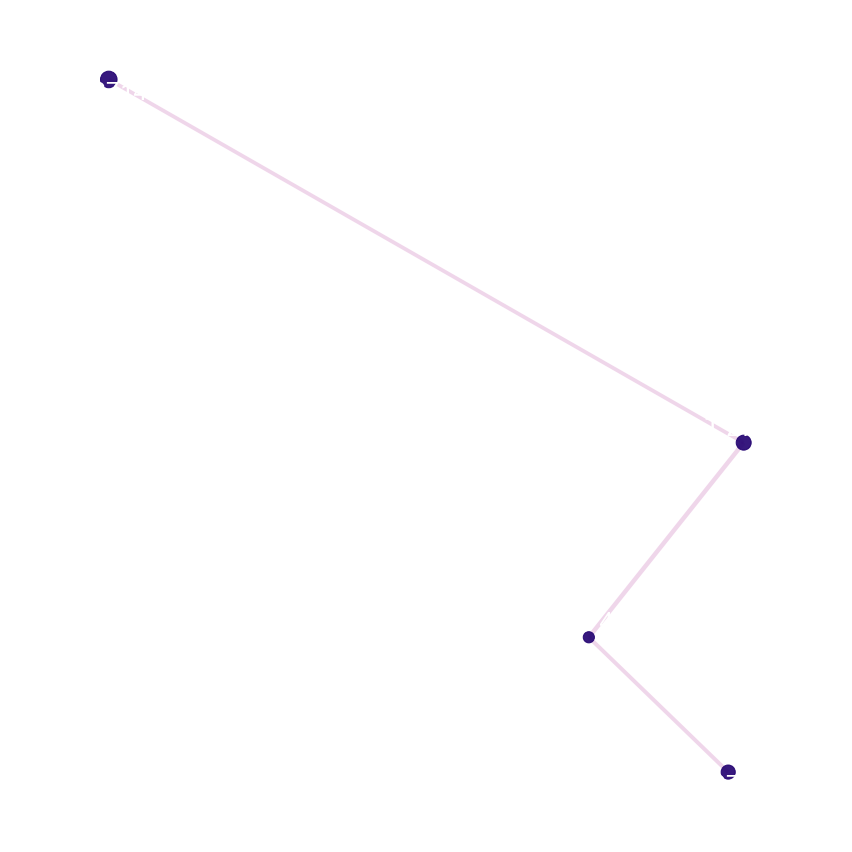

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 292.11it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.25  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 234.77it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.33  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 259.90it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 243.17it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 260.27it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 274.03it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 270.44it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


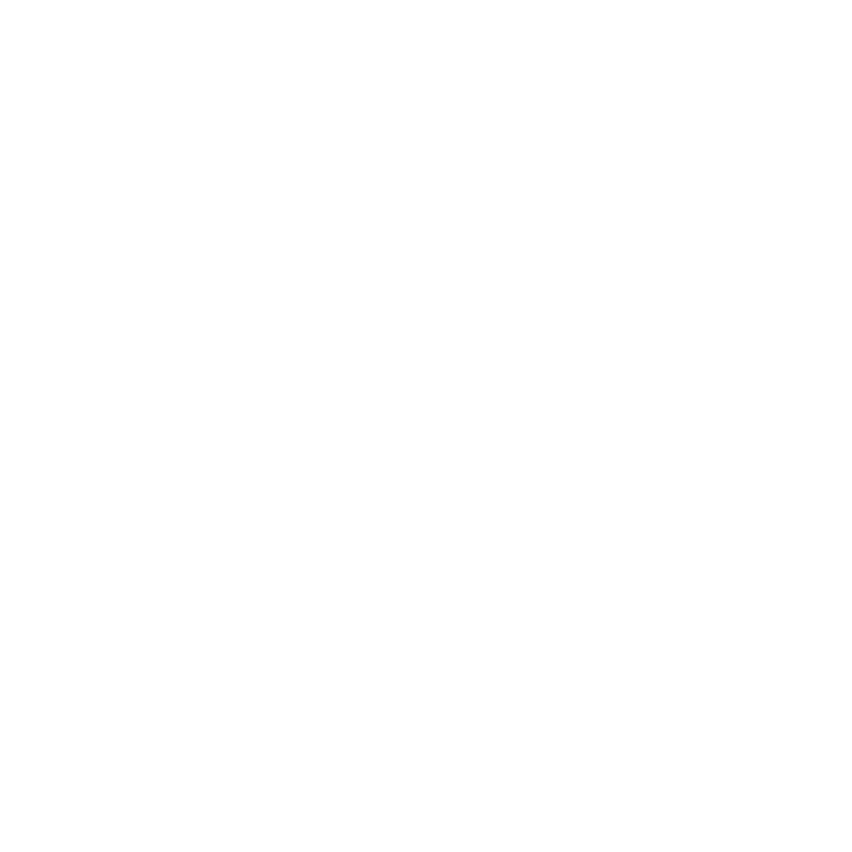

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 274.16it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 260.38it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 291.52it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.25  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 249.06it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 295.56it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.25  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 293.28it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 260.72it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


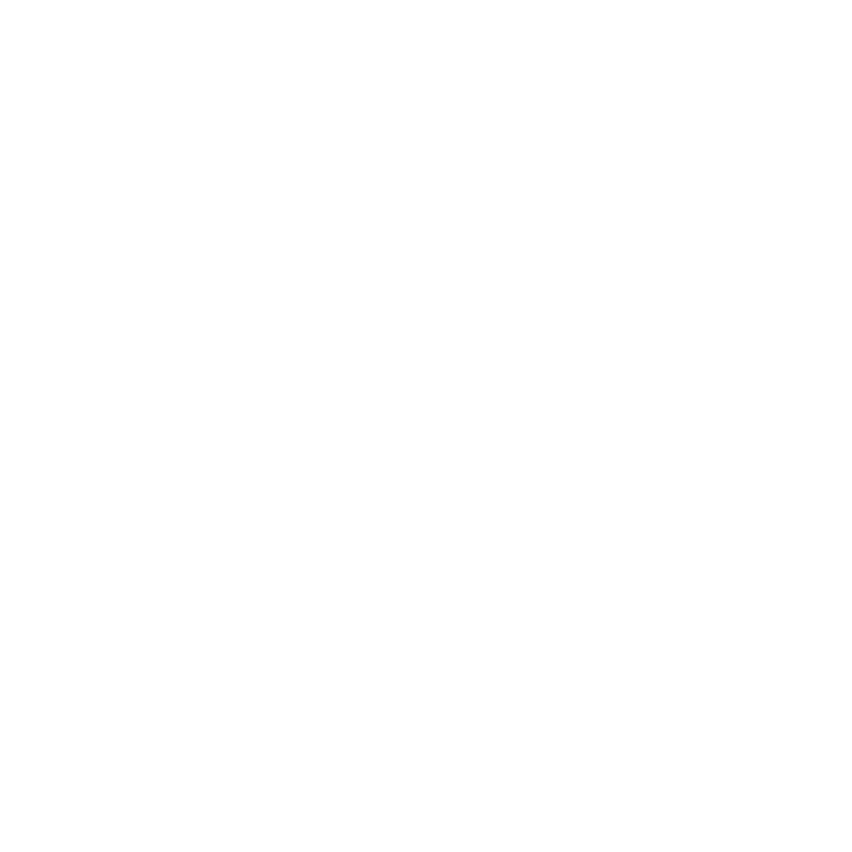

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 614.99it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 635.42it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 573.18it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 602.30it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 589.32it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 583.90it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 625.00it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


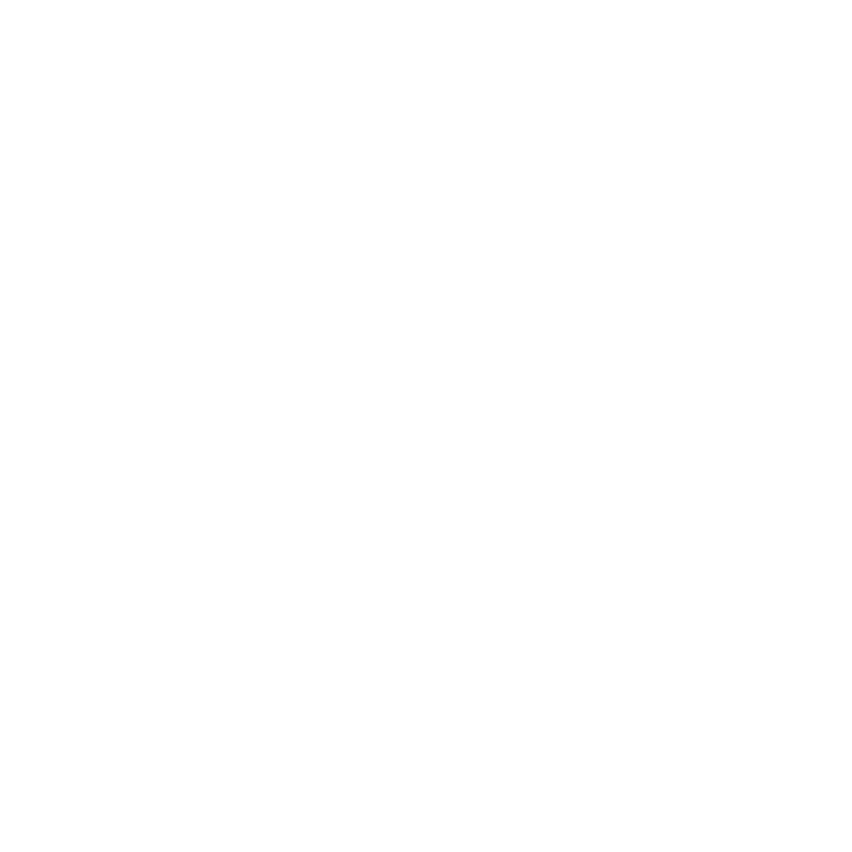

-------------------- 
 Network splitting in progress 
 --------------------


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 75.04it/s]


BarnesHut Approximation  took  0.14  seconds
Repulsion forces  took  1.08  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 91.28it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.85  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 102.28it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.73  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 84.44it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.94  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 89.13it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.88  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 80.74it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.99  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 102.58it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.72  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds
Finished with layout..


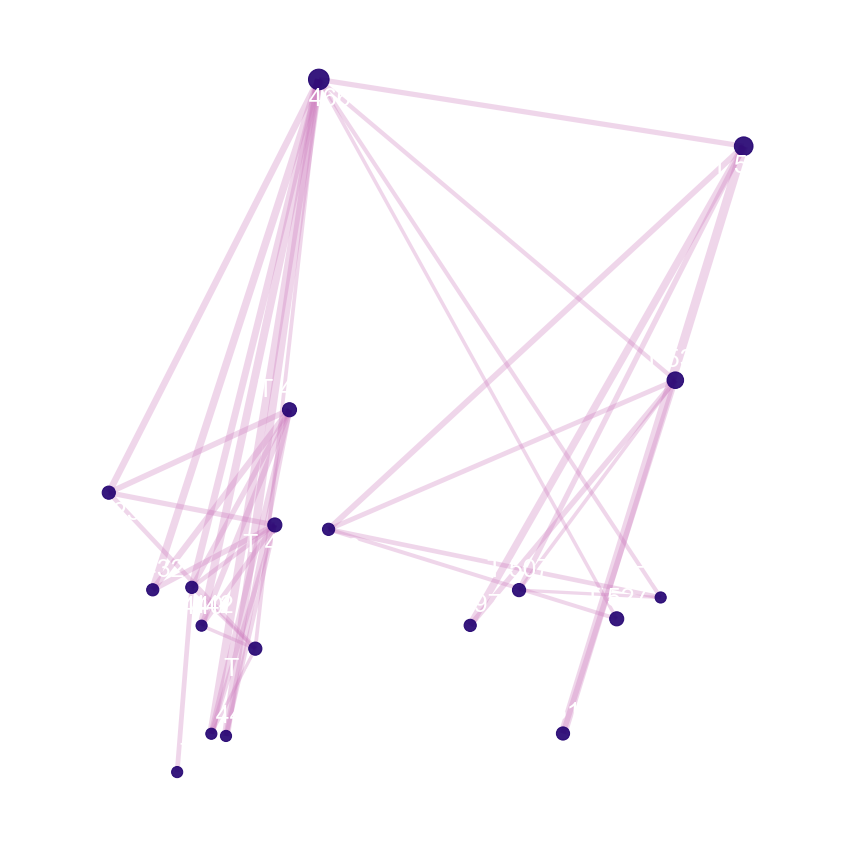

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 210.48it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.36  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 255.05it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 205.10it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.38  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 236.98it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 217.94it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.35  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 201.89it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.39  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 231.87it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.32  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds
Finished with layout..


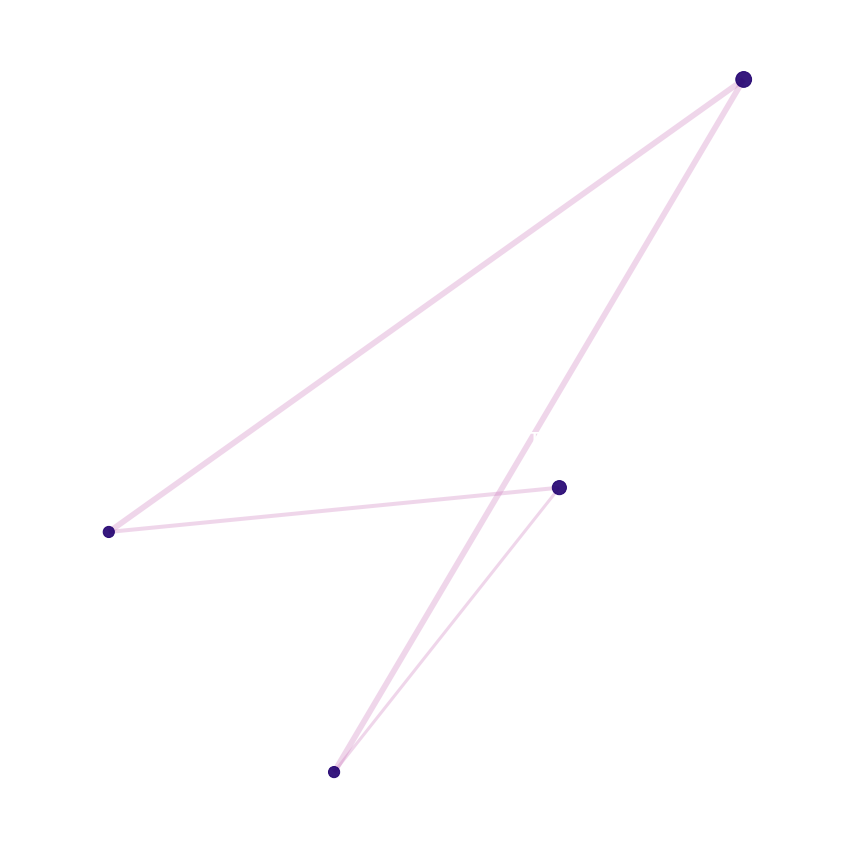

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 289.44it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.25  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 301.25it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.24  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 264.45it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 281.16it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 303.15it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.24  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 287.34it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 311.67it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.23  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..


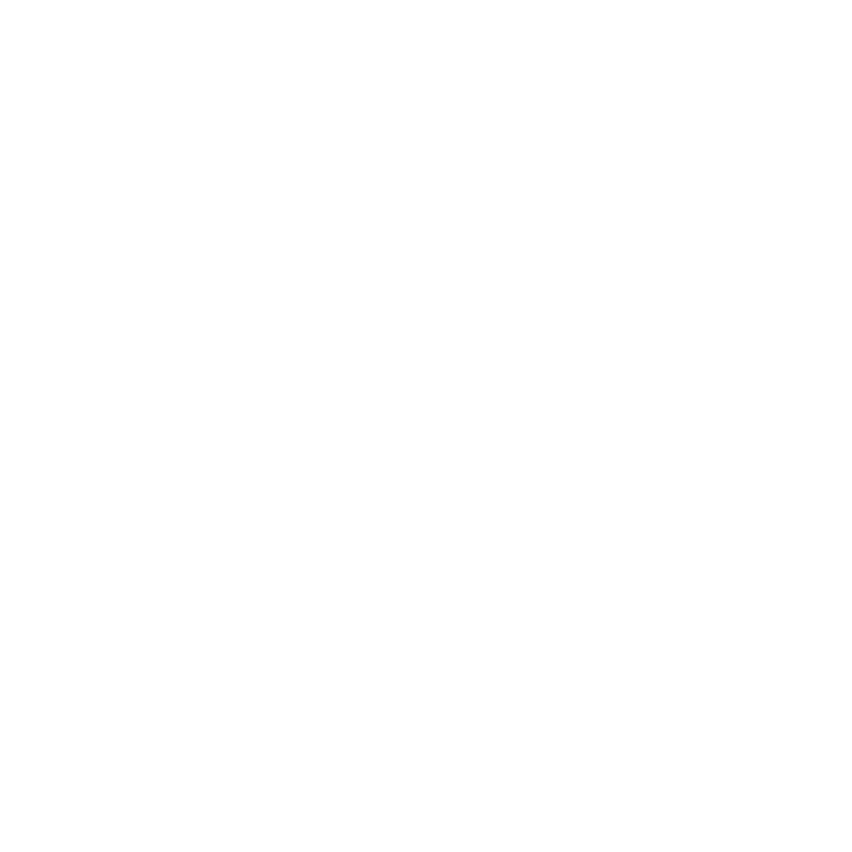

-------------------- 
 Network splitting in progress 
 --------------------


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 90.62it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.89  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 102.11it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.77  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 100.84it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.78  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 97.88it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.81  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 108.74it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.71  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 89.02it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.91  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 87.99it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.91  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds
Finished with layout..


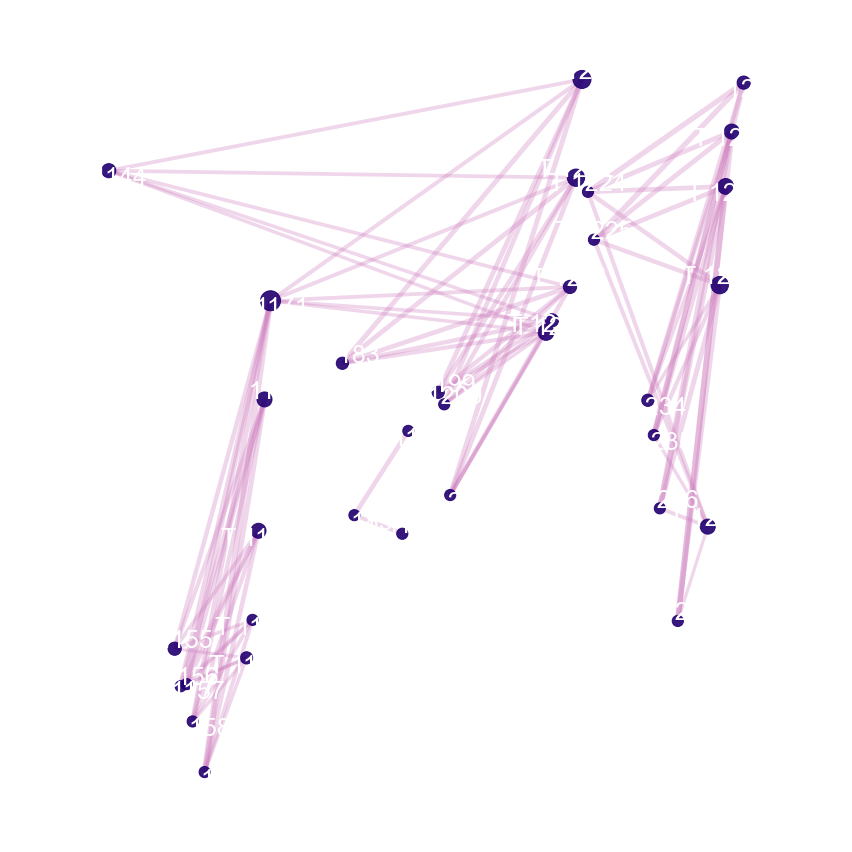

-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 258.37it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 245.89it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 263.06it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 263.67it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 251.29it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 226.07it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.34  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 218.68it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.36  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds
Finished with layout..


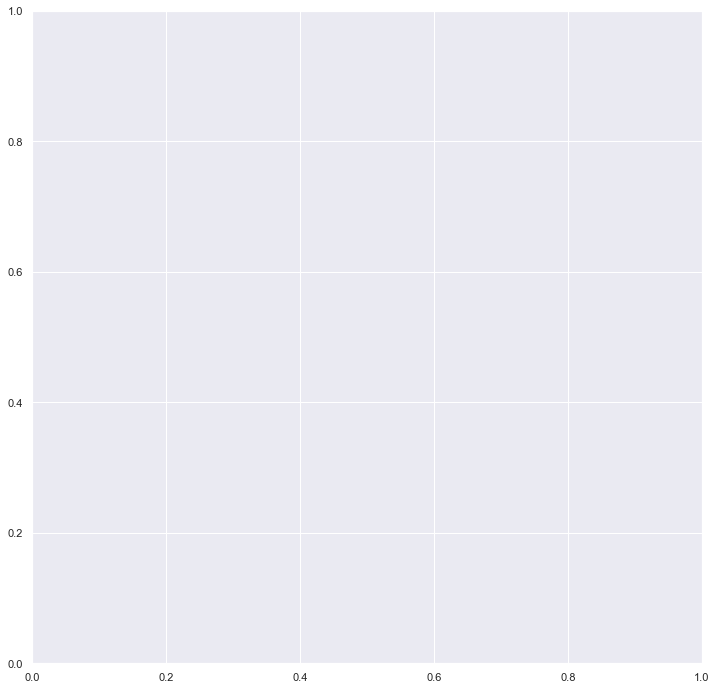

In [136]:
level = 'high'
for key, value in shapeup[level]['20001'].items():
    network_labels, graphs, multilinks = value.get_layers()
    G = graphs[0]
    H = G.copy()
    nodesize = {node:val*25 for (node, val) in H.degree()}
    nsz = {}
    for i, (node, value) in enumerate(G.degree()):
        if value < 5:
            H.remove_node(node) 

    edgs = []
    for edge in H.edges():
        edgs.append(edge[0][0])
        edgs.append(edge[1][0])
    
    h = H.copy()
    for x in list(H.nodes()):
        if x[0] in edgs:
#             print('here!')
            continue
        else:
            h.remove_node(x) 
            
    for n, v in h.nodes(data = True):
        nsz[n] = nodesize[n]
    NODESIZE = list(nsz.values())
    
    edgewidth = []
    
    fig, ax = plt.subplots(figsize=(12, 12))
    for key1,key2, value in h.edges(data = True):
        edgewidth.append(float(value['weight']))
    
    try:
        nm = X[level]['20001']['Pu'][int(key)]['node_maps']
        keep = {}
        for x,y in h.nodes(data = True):
            for k, v in nm.items():
                if int(v) == int(x[0]):
                    keep[k] = v
        ts = X[level]['20001']['Pu'][int(key)]['ts']
        test_dict = {}
        new = {}
        new_text = {}
        pos_edit = [.025,-.025]

        for i, time in keep.items():
            x = time
            y = ts[i]
            test_dict.update({('%s'%x, 'Pu'):[x,y]})
            new.update({('%s'%x, 'Pu'):[x-pos_edit[0],y+pos_edit[0]]})
            new_text.update({('%s'%x, 'Pu'):'T %s'%x})
            pos_edit.reverse()
            
        # Edges
        nx.draw_networkx_edges(h, test_dict, alpha=0.3, width=edgewidth, edge_color="m")
        # Nodes
        nx.draw_networkx_nodes(h, test_dict, node_size=NODESIZE, node_color="#210070", alpha=0.9)
        # Labels
        nx.draw_networkx_labels(h, pos = new, labels = new_text, font_size = 25, font_color = 'white')


        # Resize figure for label readibility
        ax.margins(0.1, 0.05)
        fig.tight_layout()
        plt.axis("off")
        saver = os.path.join(savepath,'%s_%s_%s.png')%('20001',level, key)
        plt.savefig('%s'%saver,  transparent=True)
        plt.show()
#         pdb.set_trace()
        
    except KeyError:
        continue

In [142]:
from py3plex.visualization.multilayer import draw_multiedges, draw_multilayer_default, hairball_plot, plt
from py3plex.visualization import bezier

In [143]:
import matplotlib.pyplot as plt

In [144]:
import collections

In [145]:
od = collections.OrderedDict(sorted(shapeup['high']['20001'].items()))

In [146]:
od

OrderedDict([('0',
              <py3plex.core.multinet.multi_layer_network at 0x7f835908e310>),
             ('1',
              <py3plex.core.multinet.multi_layer_network at 0x7f835908e580>),
             ('2',
              <py3plex.core.multinet.multi_layer_network at 0x7f835908e220>),
             ('3',
              <py3plex.core.multinet.multi_layer_network at 0x7f835909b6d0>),
             ('4',
              <py3plex.core.multinet.multi_layer_network at 0x7f8368baf550>),
             ('5',
              <py3plex.core.multinet.multi_layer_network at 0x7f835908e460>),
             ('6',
              <py3plex.core.multinet.multi_layer_network at 0x7f8368bd73a0>),
             ('7',
              <py3plex.core.multinet.multi_layer_network at 0x7f8368bd7910>),
             ('8',
              <py3plex.core.multinet.multi_layer_network at 0x7f83590a5880>)])

In [147]:
shapeup['high']['20001'].keys()

dict_keys(['7', '6', '4', '5', '1', '0', '2', '3', '8'])

In [148]:
G

In [149]:
colors = ['EB3AD9','#E95F69','#A485F7','#E95F69','#5CC894','#56BEEC']


'#56BEEC','#E95F69','#E95F69','#5CC894','#A485F7','#55BA36','EB3AD9'

In [165]:
def hex_to_RGB(hex):
    ''' "#FFFFFF" -> [255,255,255] '''
    # Pass 16 to the integer function for change of base
    return [int(hex[i:i + 2], 16) for i in range(1, 6, 2)]


In [169]:
colors2 =[]
for color in colors:
    colors2.append(hex_to_RGB(color))

In [170]:
colors2

[[179, 173, 9],
 [233, 95, 105],
 [164, 133, 247],
 [233, 95, 105],
 [92, 200, 148],
 [86, 190, 236]]

In [201]:
Circle((1 + 1,
                    1 + 1),
                   10,
                   color='#56BEEC',
                   alpha=0)
plt.show()

In [216]:
import numpy as np
import networkx as nx
try:
    from matplotlib.patches import Rectangle
    from matplotlib.patches import Circle
except:
    pass

import random

import matplotlib.pyplot as plt

from py3plex.visualization import colors  # those are color ranges
from py3plex.visualization import bezier  # those are bezier curves
from py3plex.visualization import polyfit
from py3plex.visualization.layout_algorithms import compute_force_directed_layout, compute_random_layout
from py3plex.visualization import drawing_machinery

try:
    import plotly.graph_objects as go
    plotly_import = True
    
except:
    plotly_import = False
def test_draw_multilayer_default(network_list,
                            display=True,
                            node_size=10,
                            alphalevel=0.13,
                            rectanglex=1,
                            rectangley=1,
                            background_shape="circle",
                            background_color="rainbow",
                            networks_color="rainbow",
                            labels=False,
                            arrowsize=0.5,
                            label_position=1,
                            verbose=False,
                            remove_isolated_nodes=False,
                            axis=None,
                            edge_size=1,
                            node_labels=False,
                            node_font_size=5,
                            scale_by_size=False):

    
    """Core multilayer drawing method
    Args:
    network_list (list): a list of networks
    display (bool): Whether to display or not (directly)
    node_size (int): size of the nodes
    alphalevel (float): transparency level
    rectanglex (float): size of rectangles (background) (horizontal part)
    rectangley (float): size of vertical parts of rectangles
    background_shape (string): Background shape, either circle or rectangle
    background_color (string): Background color
    networks_color (string): Color of individual networks
    labels (bool): Display labels?
    arrowsize (float): Sizes of individual arrows
    label_position (int): position of labels  (diagonal right)
    verbose (bool): Verbose printout?
    remove_isolated_nodes (bool): Remove isolated nodes?
    axis (bools): axis are displayed
    edge_size (float): Size of edges
    node_labels (bool): Display node labels?
    node_font_size (int): Size of the font
    scale_by_size (bool): Scale nodes according to their degrees?
    Returns:
        None
    """
#    main_figure = plt.figure()
#    shape_subplot = main_figure.add_subplot(111)

    shape_subplot = plt.gca()
    facecolor_list_background = ['#EB3AD9','#E95F69','#A485F7','#E95F69','#5CC894','#56BEEC']*20
    alphalevel = 0
       

    
    facecolor_list = ['#EB3AD9','#E95F69','#A485F7','#E95F69','#5CC894','#56BEEC']*20
        

    start_location_network = 0
    start_location_background = 0
    color = 0
    shadow_size = 0.5
    circle_size = 1.05

    for network in network_list:
        if remove_isolated_nodes:
            isolates = list(nx.isolates(network))
            network = network.copy()
            network.remove_nodes_from(isolates)

        if verbose:
            print(nx.info(network))
        degrees = dict(nx.degree(nx.Graph(network)))
        cntr = 0
        cntr_all = 0
        no_position = []
        all_positions = []
        for node in network.nodes(data=True):
            if 'pos' not in node[1]:
                no_position.append(node[0])
                cntr += 1
            else:
                all_positions.append(node[1]['pos'])
                cntr_all += 1

        if len(no_position) > 0:
            network = network.copy()
            network.remove_nodes_from(no_position)

        positions = nx.get_node_attributes(network, 'pos')
        cntr = 0

        for node, position in positions.items():
            position += start_location_network

        # this is the default delay for matplotlib canvas
        if labels != False:
            try:
                plt.text(start_location_network + label_position,
                                   start_location_network - label_position,
                                   labels[color])
            except Exception as es:                
                print(es)
        
        print(facecolor_list_background[color])

        shape_subplot.add_patch(
            Circle((start_location_background + shadow_size,
                    start_location_background + shadow_size),
                   circle_size,
                   color=facecolor_list_background[color],
                   alpha=alphalevel))
        color = color+1
        

        start_location_network += 1.5
        start_location_background += 1.5
        # if len(network.nodes()) > 10000:
        #     correction=10
        # else:
        #     correction = 1

        if scale_by_size:
            node_sizes = [vx * node_size for vx in degrees.values()]
        else:
            node_sizes = [node_size for vx in degrees.values()]

        if np.sum(node_sizes) == 0:
            node_sizes = [node_size for vx in degrees.values()]



        drawing_machinery.draw(network,
                               positions,
                               node_color='black',
                               with_labels=node_labels,
                               edge_size=edge_size,
                               node_size=node_sizes,
                               arrowsize=arrowsize,
                               ax=axis,
                               font_size=node_font_size)


    if display == True:
        plt.show()

In [210]:
def test_draw_multiedges(network_list,
                    multi_edge_tuple,
                    input_type="nodes",
                    linepoints="-.",
                    alphachannel=0.3,
                    linecolor="black",
                    curve_height=1,
                    style="curve2_bezier",
                    linewidth=1,
                    invert=False,
                    linmod="both",
                    resolution=0.001):
    # indices are correct network positions
#    main_figure = plt.figure()
#    shape_subplot = main_figure.add_subplot(111)
    
    if input_type == "nodes":

        network_positions = [
            nx.get_node_attributes(network, 'pos') for network in network_list
        ]

        global_positions = {}
        for position in network_positions:
            for k, v in position.items():
                global_positions[k] = v

        for pair in multi_edge_tuple:
            try:

                coordinates_node_first = global_positions[pair[0]]
                coordinates_node_second = global_positions[pair[1]]
                color = int(float(pair[2]['weight']))

                p1 = [coordinates_node_first[0], coordinates_node_second[0]]
                #[coordinates_node_first[0], coordinates_node_first[1]]
                p2 = [coordinates_node_first[1],
                      coordinates_node_second[1]]  # []

                if style == "line":

                    plt.plot(p1,
                             p2,
                             linestyle=linepoints,
                             lw=1,
                             alpha=alphachannel,
                             color=linecolor)

                elif style == "curve2_bezier":

                    x, y = bezier.draw_bezier(len(network_list),
                                              p1,
                                              p2,
                                              path_height=curve_height,
                                              inversion=invert,
                                              linemode=linmod,
                                              resolution=resolution)
                    if int(float(pair[2]['weight'])) >= 7:
                        c = test['hex'][color]

                        plt.plot(x,
                                 y,
                                 linestyle=linepoints,
                                 lw=linewidth,
                                 alpha=alphachannel,
                                 color=c)

                elif style == "curve3_bezier":

                    x, y = bezier.draw_bezier(len(network_list),
                                              p1,
                                              p2,
                                              mode="cubic",
                                              resolution=resolution)

                elif style == "curve3_fit":

                    x, y = polyfit.draw_order3(len(network_list), p1, p2)

                    plt.plot(x, y)

                elif style == "piramidal":

                    x, y = polyfit.draw_piramidal(len(network_list), p1, p2)
                    plt.plot(x,
                             y,
                             linestyle=linepoints,
                             lw=1,
                             alpha=alphachannel,
                             color=linecolor)

                else:
                    pass

            except Exception as err:
                pass


In [211]:
def test_visualize_network(self,
                          sub = False,
                          ROI = False,
                            i = False,
                          style="diagonal",
                          parameters_layers=None,
                          parameters_multiedges=None,
                          show=False,
                          compute_layouts="force",
                          layouts_parameters=None,
                          verbose=True,
                          orientation="upper",
                          resolution=0.01,
                          axis=None,
                          fig=None,
                          no_labels=False,
                          linewidth=1.7,
                          alphachannel=0.3,
                          linepoints="-.",
                          legend=False):
#         if server_mode:
#             return 0
        """ 
        network visualization.
        Either use diagonal or hairball style. Additional parameters are added with parameters_layers and parameters_edges etc.
        """

        if style == "diagonal":
            network_labels, graphs, multilinks = self.get_layers(style)
            if no_labels:
                network_labels = None
            if parameters_layers is None:
                if axis:
                    axis = draw_multilayer_default(graphs,
                                                   display=False,
                                                   background_shape="circle",
                                                   labels=network_labels,
                                                   node_size=3,
                                                   verbose=verbose)
                else:
                    ax = test_draw_multilayer_default(graphs,
                                                 display=False,
                                                 background_shape="circle",
                                                 labels=network_labels,
                                                 node_size=3,
                                                 verbose=verbose)
            else:
                if axis:
                    axis = draw_multilayer_default(graphs, **parameters_layers)
                else:
                    ax = test_draw_multilayer_default(graphs, **parameters_layers)

            if parameters_multiedges is None:
                enum = 1
                for edge_type, edges in multilinks.items():
                    if edge_type == "coupling":
                        if axis:
                            axis = draw_multiedges(graphs,
                                                   edges,
                                                   alphachannel=alphachannel,
                                                   linepoints=linepoints,
                                                   linecolor="red",
                                                   curve_height=2,
                                                   linmod="bottom",
                                                   linewidth=linewidth,
                                                   resolution=resolution)
                        else:
                            ax = draw_multiedges(graphs,
                                                 edges,
                                                 alphachannel=alphachannel,
                                                 linepoints=linepoints,
                                                 linecolor="red",
                                                 curve_height=2,
                                                 linmod="bottom",
                                                 linewidth=linewidth,
                                                 resolution=resolution)
                    else:
                        if axis:
                            axis = draw_multiedges(graphs,
                                                   edges,
                                                   alphachannel=alphachannel,
                                                   linepoints="--",
                                                   linecolor="black",
                                                   curve_height=2,
                                                   linmod=orientation,
                                                   linewidth=linewidth,
                                                   resolution=resolution)
                        else:
                            ax = test_draw_multiedges(graphs,
                                                 edges,
                                                 alphachannel=alphachannel,
                                                 linepoints="--",
                                                 linecolor="black",
                                                 curve_height=2,
                                                 linmod=orientation,
                                                 linewidth=linewidth,
                                                 resolution=resolution)
                    enum += 1
            
            else:
                enum = 1
                for edge_type, edges in multilinks.items():
                    if axis:
                        axis = draw_multiedges(graphs, edges,
                                               **parameters_multiedges)
                    else:
                        ax = draw_multiedges(graphs, edges,
                                             **parameters_multiedges)
                    enum += 1
            if show:
                saver = os.path.join(savepath,'test%s_%s_%s.png'%(sub,ROI,  i))
                plt.savefig('%s'%saver,  transparent=True)
                plt.show()
                

            if axis:
                return axis
                saver = os.path.join(savepath,'test%s_%s_%s.png'%(sub,ROI,  i))
                plt.savefig('%s'%saver,  transparent=True)
            else:
                return ax
                saver = os.path.join(savepath,'test%s_%s_%s.png'%(sub, ROI,  i))
                plt.savefig('%s'%saver,  transparent=True)

        
                
        else:
            raise Exception(
                "Please, specify visualization style using: .style. keyword")


In [212]:
od = collections.OrderedDict(sorted(shapeup['low']['20001'].items()))

0
-------------------- 
 Network splitting in progress 
 --------------------


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 87.41it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.93  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 102.64it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.77  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 105.60it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.74  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 123.01it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.61  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 118.29it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.64  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 102.07it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.77  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 117.99it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.64  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


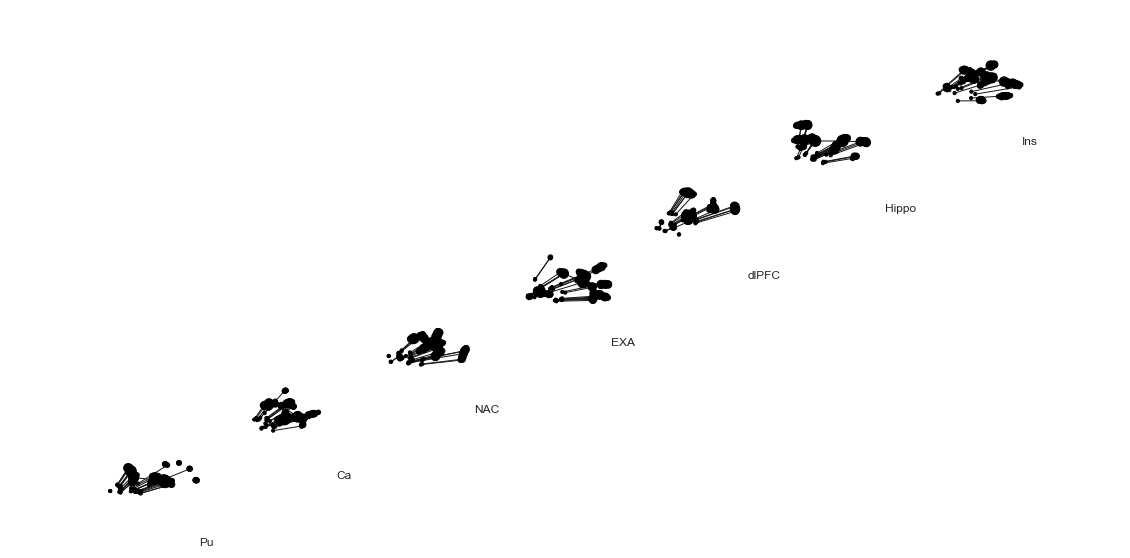

<Figure size 1440x720 with 0 Axes>

1
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 268.43it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 277.59it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 253.90it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 270.19it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 266.49it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 264.93it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 248.74it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


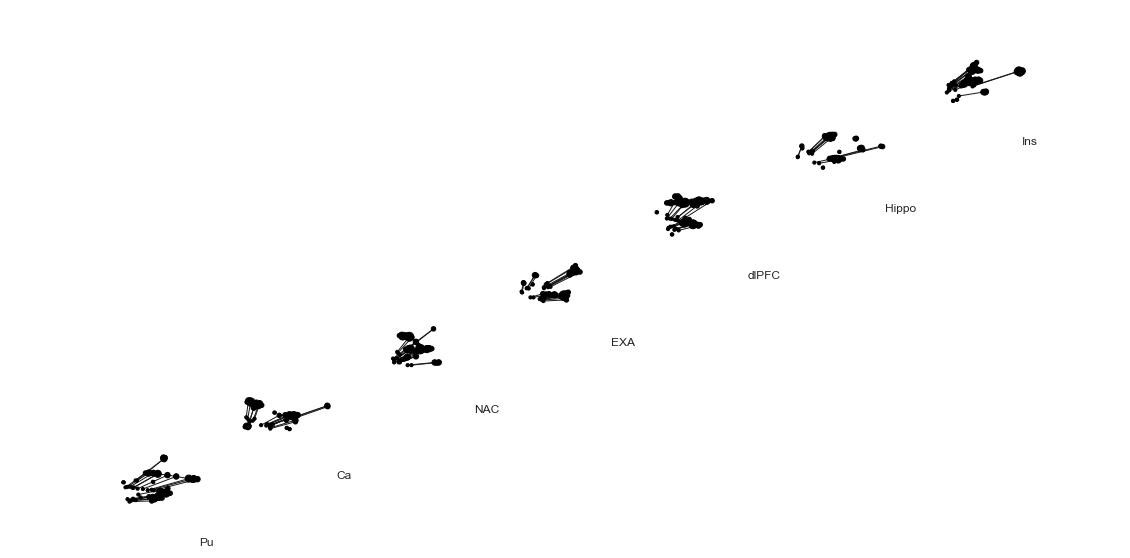

<Figure size 1440x720 with 0 Axes>

2
-------------------- 
 Network splitting in progress 
 --------------------


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 4274.97it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 10893.16it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 13486.07it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 5612.61it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 7784.53it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 5267.90it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 13605.50it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


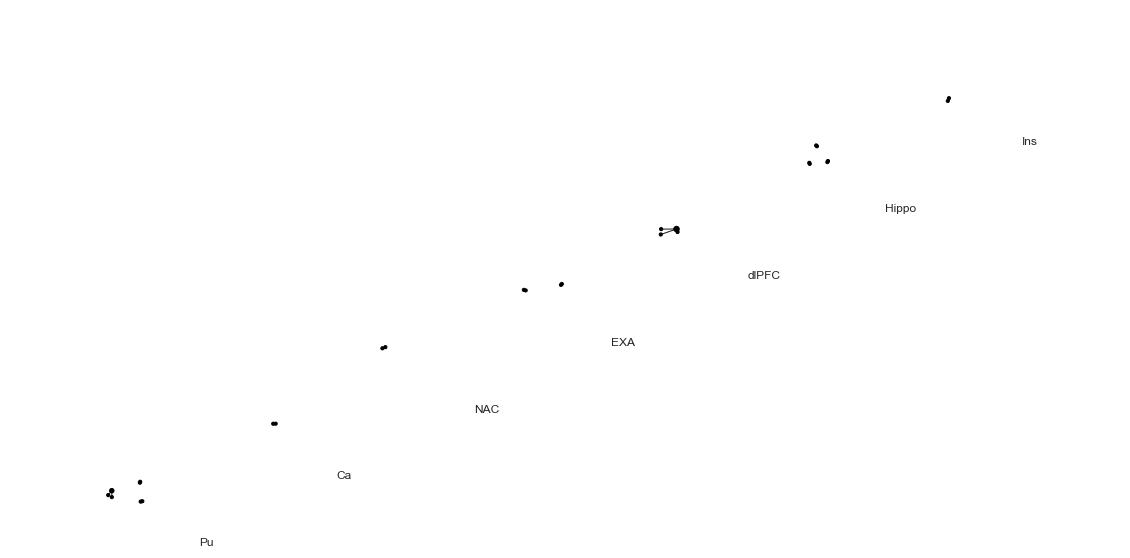

<Figure size 1440x720 with 0 Axes>

3
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 171.51it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.43  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 146.97it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.53  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 129.29it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.63  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 148.75it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.53  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 147.04it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.54  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 173.62it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.42  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 146.81it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.53  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


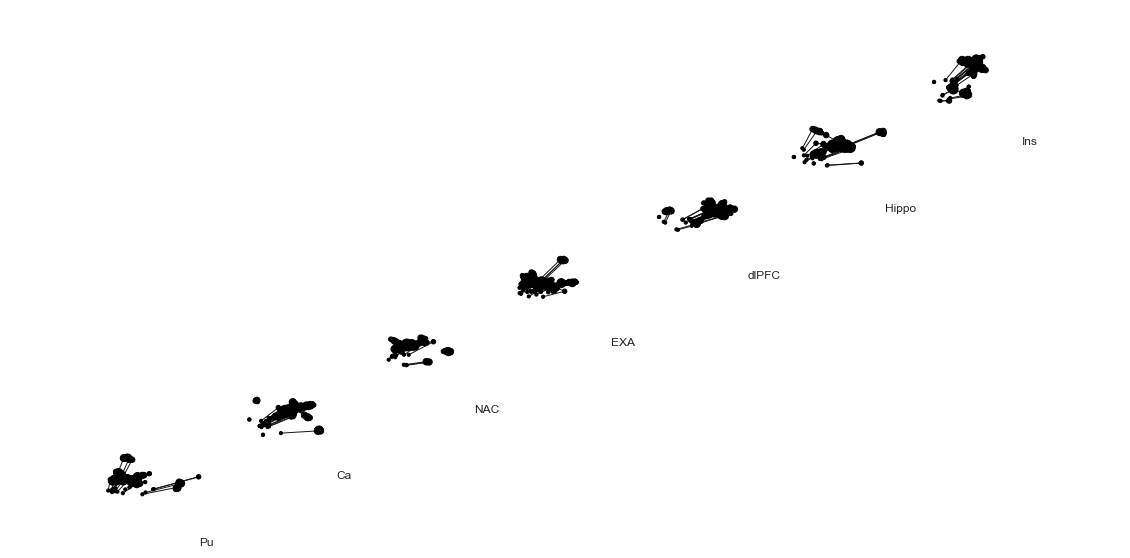

<Figure size 1440x720 with 0 Axes>

4
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 587.49it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 547.94it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 553.71it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 533.62it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 675.00it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.10  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 579.71it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 546.07it/s]


BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


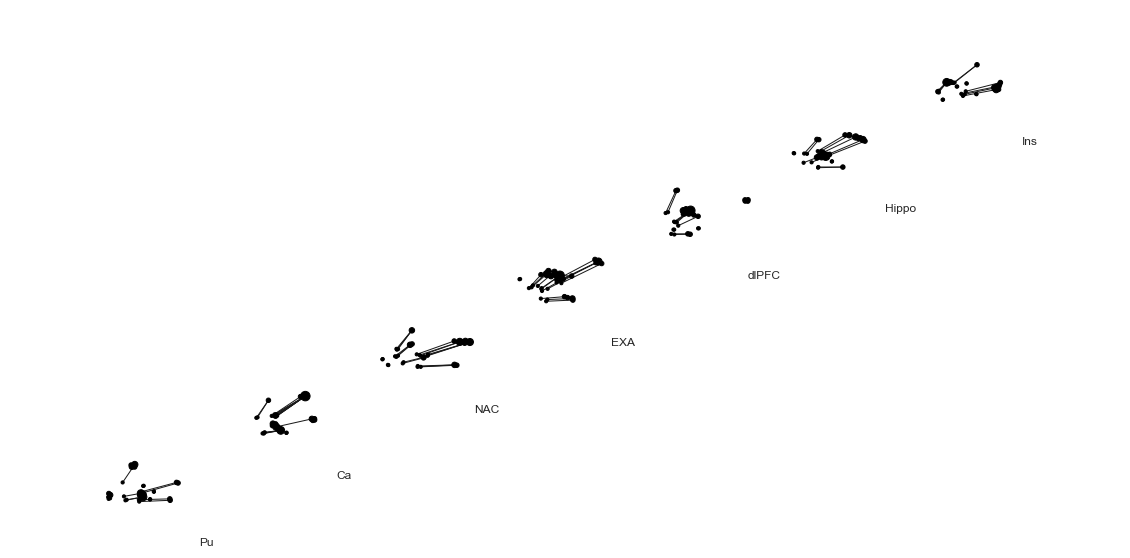

<Figure size 1440x720 with 0 Axes>

5
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 256.38it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 268.29it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 282.05it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 294.53it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.25  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 258.83it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 261.15it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 287.46it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


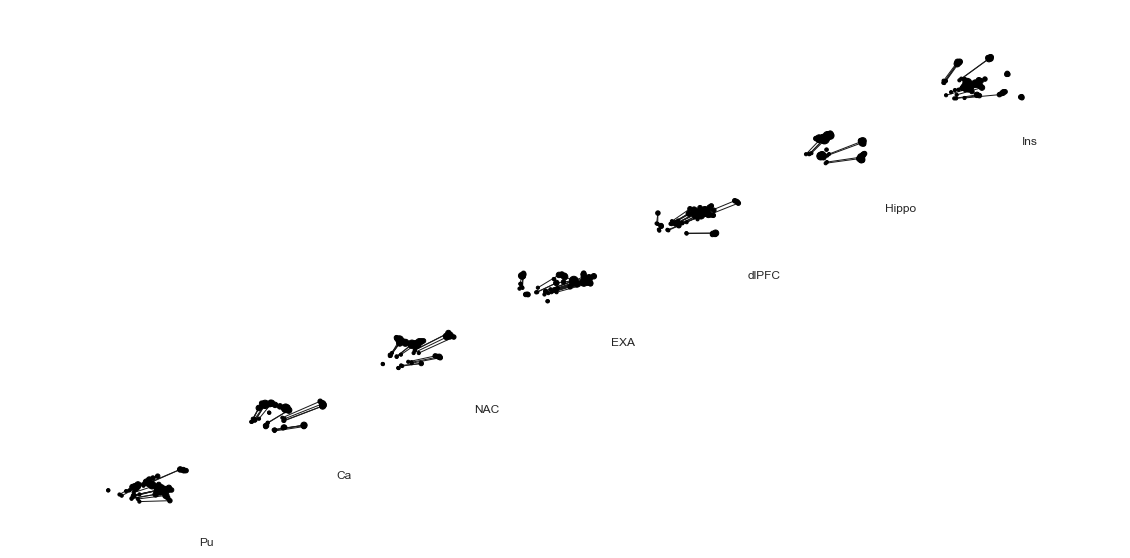

<Figure size 1440x720 with 0 Axes>

6
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 261.80it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 218.62it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.36  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 236.24it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.33  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 233.26it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.34  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 246.25it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 224.79it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.35  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 230.50it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.34  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


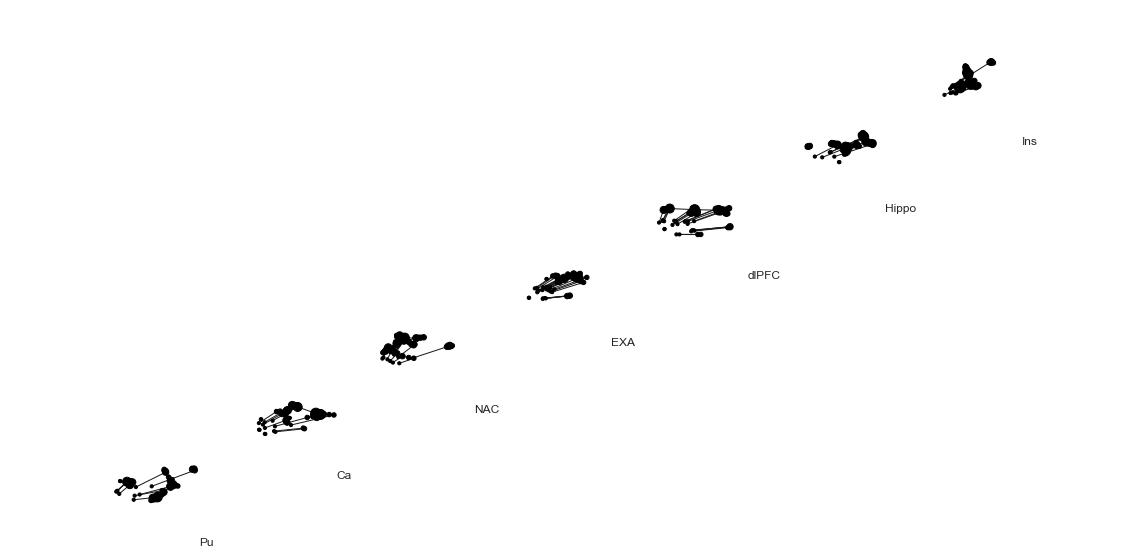

<Figure size 1440x720 with 0 Axes>

7
-------------------- 
 Network splitting in progress 
 --------------------


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2706.60it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1932.94it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2626.55it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 3147.93it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2401.59it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2659.79it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 7114.90it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


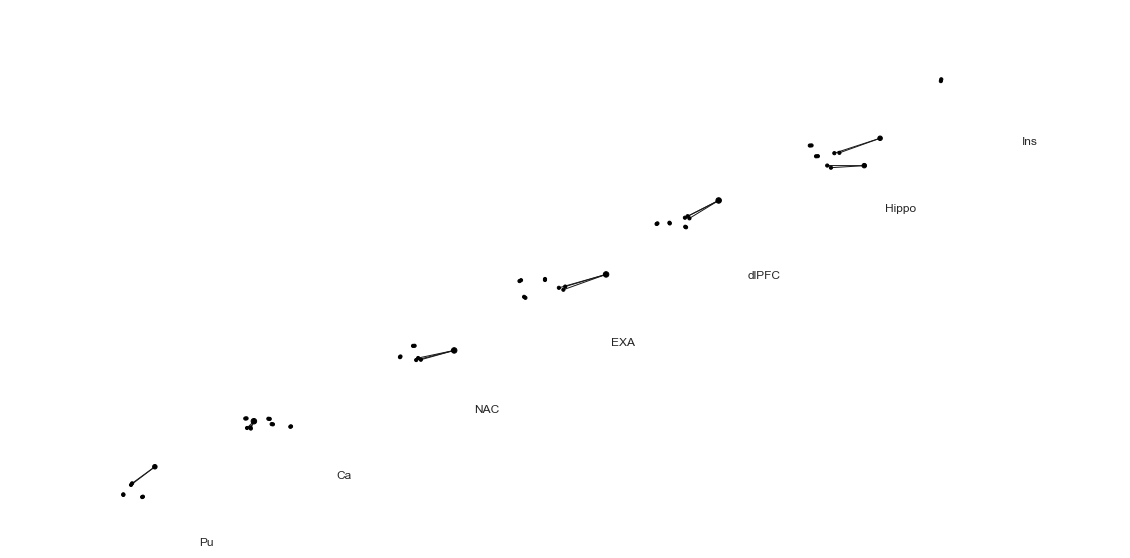

<Figure size 1440x720 with 0 Axes>

8
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 274.31it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 253.34it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 300.05it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.24  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 254.15it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.31  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 217.76it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.36  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 268.45it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 286.60it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.25  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


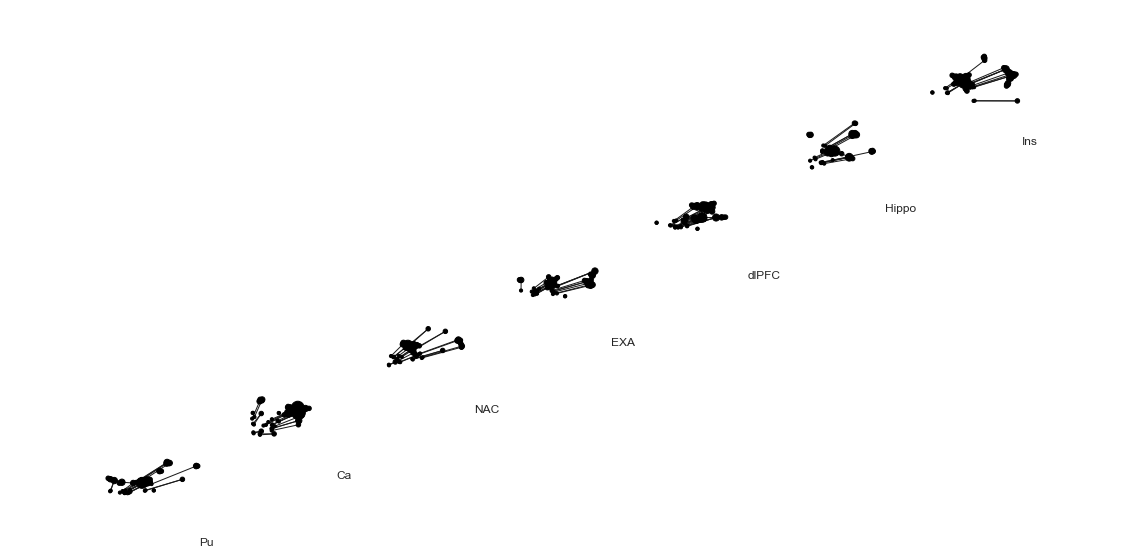

<Figure size 1440x720 with 0 Axes>

9
-------------------- 
 Network splitting in progress 
 --------------------


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 276.62it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 256.58it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 277.31it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.27  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 256.84it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 256.84it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 254.78it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.30  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 261.05it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.29  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds
Finished with layout..
#EB3AD9
#E95F69
#A485F7
#E95F69
#5CC894
#56BEEC
#EB3AD9


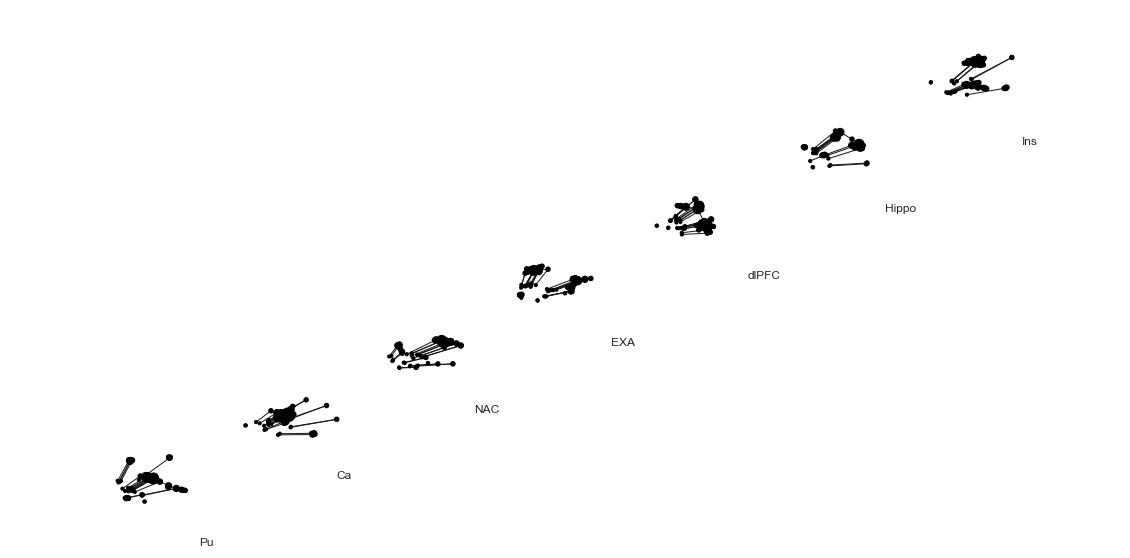

<Figure size 1440x720 with 0 Axes>

In [217]:
plt.rcParams['figure.figsize'] = [20, 10]

for i, G in od.items():
    print(i)
    test_visualize_network(G,sub = 'sub-20001',
                          ROI = 'low',
                            i = i,
                          style="diagonal",
                          parameters_layers={'scale_by_size':True, 
                                             'display':True, 
                                             'labels':network_labels, 
                                             "remove_isolated_nodes":True,
                                            "background_color":'cust',
                            "networks_color":'cust'},
                          parameters_multiedges=None,
                          show=True,
                          compute_layouts="force",
                          layouts_parameters=None,
                          verbose=True,
                          orientation="upper",
                          resolution=0.01,
                          axis=None,
                          fig=None,
                          no_labels=False,
                          linewidth=1.7,
                          alphachannel=0.3,
                          linepoints="-.",
                          legend=False)

In [ ]:
G = graphs[1]

In [ ]:
G

In [ ]:
X = onetoughjar(os.path.join(savepath,'tmp','graphs_weight_dist_smz*'))

In [ ]:
G.nodes(data = True)[('2340', 'Ca')]

In [ ]:
X['low']['20001']['Ca'][8]

In [ ]:
X['low']['20001']['Ca'][1].keys()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
#pos[0] = (0.5, 0.5)

keepX = [0]*len(pos)
keepY = [0]*len(pos)
keepDist = []
for i, (key, value) in enumerate(pos.items()):
    print(i)
    if i == 0:
        keepX[i] = value[0]
        keepY[i] = value[1]
    else:
        keepX[i] = value[0]
        keepY[i] = value[1]
        dist = math.hypot(keepX[i-1] - keepX[i], keepY[i-1] - keepY[i])
        keepDist.append(dist)
        H.add_edge(i-1, i, weight=dist)

# H = G.copy()

pos.keys()

In [ ]:
pos

In [ ]:
H.edges(data = True)

In [ ]:
pos

In [ ]:
H.nodes(data = True)

In [ ]:
rmv = []
for node, X in H.nodes(data = True):
#     print(len(X['pos']))
    try:
        if len(X['pos']) < 2:
            rmv.append(node)
    except KeyError:
        rmv.append(node)
        

In [ ]:
for node in rmv:
    H.remove_node(node)

In [ ]:
G.add_node(1,pos=(1,1))

In [ ]:
H.nodes(data = True)

In [ ]:
nx.draw_networkx(
    H,
    pos,
    with_labels=True,
    edge_color="red",
    node_size=200,
    width=3,
)

In [ ]:
H.edges(data = True)

In [ ]:
pos.values()

In [ ]:
G = nx.random_geometric_graph(20, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

In [ ]:
pos

In [ ]:
for x, y in pos.items():
    print(y)

In [ ]:
pos.keys()

In [ ]:
len(pos)

In [ ]:
network_labels

In [ ]:
test={'hex':['#F5F5DC','#F5F5DC','#F5F5DC','#FFB6C1','#32CD32','#9370DB','#FF0000','#40E0D0']}